In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# データセットの生成

In [2]:
# forgeデータセットの生成
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


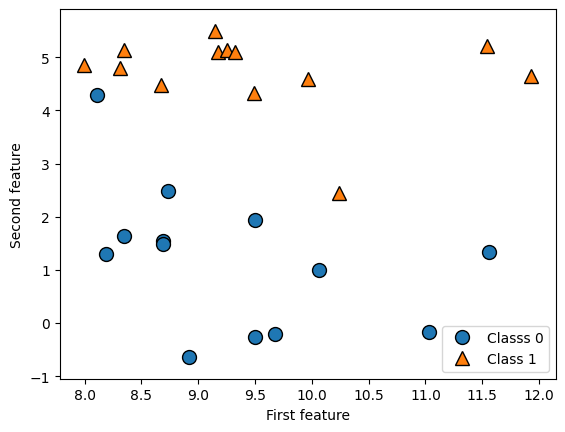

In [3]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Classs 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [4]:
# waveデータセットの生成
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

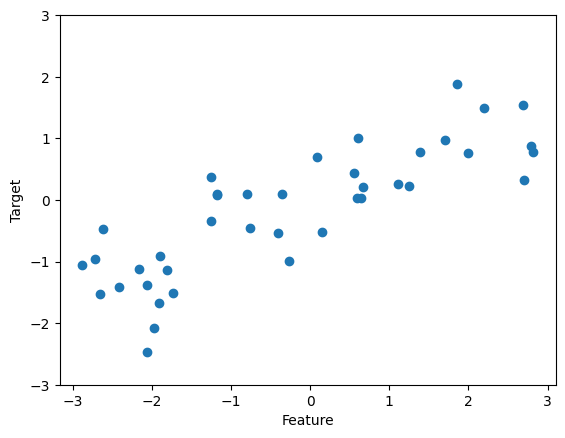

In [5]:
# データセットをプロット
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
# cancerデータセットの生成
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key(): \n{}".format(cancer.keys()))

cancer.key(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
# データセットの確認
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# boston_housingデータセットの生成
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
# boston_housingデータセット生成関数の定義
# https://stackoverflow.com/questions/57645829/why-am-i-getting-a-syntaxwarning-invalid-escape-sequence-s-warning
# https://wayama.io/article/library/sklearn/datasets/
# https://bbengfort.github.io/2016/04/bunch-data-management/
# https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
def load_boston():
    import numpy as np
    import pandas as pd
    from sklearn.utils import Bunch
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    target_names = ['MEDV']
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    DESCR = """
        .. _boston_dataset:

        Boston house prices dataset
        ---------------------------
        
        **Data Set Characteristics:**  
        
            :Number of Instances: 506 
        
            :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
        
            :Attribute Information (in order):
                - CRIM     per capita crime rate by town
                - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
                - INDUS    proportion of non-retail business acres per town
                - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                - NOX      nitric oxides concentration (parts per 10 million)
                - RM       average number of rooms per dwelling
                - AGE      proportion of owner-occupied units built prior to 1940
                - DIS      weighted distances to five Boston employment centres
                - RAD      index of accessibility to radial highways
                - TAX      full-value property-tax rate per $10,000
                - PTRATIO  pupil-teacher ratio by town
                - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                - LSTAT    % lower status of the population
                - MEDV     Median value of owner-occupied homes in $1000's
        
            :Missing Attribute Values: None
        
            :Creator: Harrison, D. and Rubinfeld, D.L.
        
        This is a copy of UCI ML housing dataset.
        https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
        
        
        This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
        
        The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
        prices and the demand for clean air', J. Environ. Economics & Management,
        vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
        ...', Wiley, 1980.   N.B. Various transformations are used in the table on
        pages 244-261 of the latter.
        
        The Boston house-price data has been used in many machine learning papers that address regression
        problems.   
             
        .. topic:: References
        
           - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
           - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
    """
    return Bunch(data=data,
                 target=target,
                 frame=None,
                 target_names=target_names,
                 feature_names=feature_names,
                 DESCR=DESCR)

In [10]:
boston = load_boston()
# print(boston.keys())
# print(boston.data)
# print(boston.target)
# print(boston.frame)
# print(boston.target_names)
# print(boston.feature_names)
# print(boston.DESCR)
print(type(boston))
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(data=boston.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (506, 13)
Target shape: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
# print(california.keys())
# print(california.data)
# print(california.target)
# print(california.frame)
# print(california.target_names)
# print(california.feature_names)
# print(california.DESCR)
print(type(california))
print("Data shape: {}".format(california.data.shape))
print("Target shape: {}".format(california.target.shape))

df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedianHouseValue'] = pd.DataFrame(data=california.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (20640, 8)
Target shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# 特徴量の交互作用も含めたデータの読み込み
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# ナイーブドベイズクラス分類器

In [13]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [14]:
counts = {}
for label in np.unique(y):
    # クラスに対してループ
    # それぞれの特徴量ごとに非ゼロの数を（加算で）数える
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 分析
- データ
<table>
    <tr>
        <th colspan=4>データポイント</th>
        <th>クラス</th>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

- クラス0について
<table>
    <tr>
        <th> </th>
        <th colspan=4>データポイント</th>
        <th>クラス</th>
    </tr>
    <tr>
        <td></td>
        <td>0</td>
        <td bgcolor=red>1</td>
        <td>0</td>
        <td bgcolor=red>1</td>
        <td bgcolor=red>0</td>
    </tr>
    <tr>
        <td></td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td></td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td bgcolor=red>1</td>
        <td bgcolor=red>0</td>
    </tr>
    <tr>
        <td></td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>非ゼロ特徴量の数</td>
        <td>0</td>
        <td bgcolor=red>1</td>
        <td>0</td>
        <td bgcolor=red>2</td>
        <td></td>
    </tr>
- クラス1について
<table>
    <tr>
        <th> </th>
        <th colspan=4>データポイント</th>
        <th>クラス</th>
    </tr>
    <tr>
        <td></td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td></td>
        <td bgcolor=red>1</td>
        <td>0</td>
        <td bgcolor=red>1</td>
        <td bgcolor=red>1</td>
        <td bgcolor=red>1</td>
    </tr>
    <tr>
        <td></td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td></td>
        <td bgcolor=red>1</td>
        <td>0</td>
        <td bgcolor=red>1</td>
        <td>0</td>
        <td bgcolor=red>1</td>
    </tr>
    <tr>
        <td>非ゼロ特徴量の数</td>
        <td bgcolor=red>2</td>
        <td>0</td>
        <td bgcolor=red>2</td>
        <td bgcolor=red>1b</td>
        <td></td>
    </tr></table>

In [15]:
# 肺がんデータの分類
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [16]:
# ガウシアン・ナイーブドベイズ（腫瘍の大きさや色など、正規分布に従うと推定される特徴量のため、比較的正確に予測できる）
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gaussianNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gaussianNB.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.937


In [17]:
# ベルヌーイ・ナイーブドベイズ（ニ値データを仮定しているので、肺がんデータでは正しい分類はできない）
from sklearn.naive_bayes import BernoulliNB
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train, y_train)
print("Training set score: {:.3f}".format(bernoulliNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(bernoulliNB.score(X_test, y_test)))

Training set score: 0.627
Test set score: 0.629


In [18]:
# マルチノミアル・ナイーブドベイズ（多値データを仮定しているので、肺がんデータでは正しい分類はできない）
from sklearn.naive_bayes import MultinomialNB
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)
print("Training set score: {:.3f}".format(multinomialNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(multinomialNB.score(X_test, y_test)))

Training set score: 0.887
Test set score: 0.923


In [19]:
# ロジスティック回帰との比較
import time
from sklearn.linear_model import LogisticRegression

print("ロジスティック回帰の性能と実行時間")
start = time.time()
logreg = LogisticRegression(solver="liblinear", C=100).fit(X_train, y_train)
end = time.time()
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print("Elapsed time: {:f}[ms]".format((end - start)*1000))

print("")
print("ガウシアン・ナイーブドベイズの性能と実行時間")
start = time.time()
gaussianNB = GaussianNB().fit(X_train, y_train)
end = time.time()
print("Training set score: {:.3f}".format(gaussianNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gaussianNB.score(X_test, y_test)))
print("Elapsed time: {:f}[ms]".format((end - start)*1000))

ロジスティック回帰の性能と実行時間
Training set score: 0.977
Test set score: 0.965
Elapsed time: 11.758089[ms]

ガウシアン・ナイーブドベイズの性能と実行時間
Training set score: 0.946
Test set score: 0.937
Elapsed time: 0.872612[ms]


## 利点と欠点とパラメータ
- 特徴ベクトル間に独立性を仮定したモデル
- GaussianNBは高次元データ、BernoulliNB/MultinomialNBはテキストのような疎なカウントデータに対して用いられる
- 利点
    - 高速
    - モデルサイズが小さい
- 欠点
    - 線形モデル等と比較して精度が低い
- パラメータ
    - アルファ：モデルの複雑さを制御する（MultinomialNB, BernoulliNB）、値が大きくなると複雑さが減少する
        - すべての特徴量が正の値を持つデータ点をアルファの値に応じて追加することで、特徴量の平均値を上昇させる